In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# **Predict the Success of Bank telemarketing** -**MACHINE LEARNING PROBLEM**

![alt text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*1t76r3PETfA0iHfkrC1F1Q.jpeg)

# Description

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Evaluation

The evaluation section describes how submissions will be scored and how participants should format their submissions.

Submissions are evaluated on f1_score(average='macro') between the predicted classes and the True target.

www.kaggle.com/competitions/predict-the-success-of-bank-telemarketing/overview/evaluation

In [41]:
import pandas as pd
raw_df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')


The dataset contains 39211 rows and 16 columns. Each row of the dataset contains information about one client.

Our objective is to find a way to find whether the client will subscribe the term deposit(yes) or not (no). If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age,job, marital,education,default,housing,loan etc.

Let's check the data type for each column.

In [42]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.


looks like age , balance, duration, campaign, pdays and previous are numeric ,whereas columns like job, marital, job, education, default, balance, housing, loan, contact, poutcome and target are string (possibly categories).

Here are some statistics for the numerical columns:

In [43]:
raw_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000




*   The spread for the age is seems to be reasonable (no negative values for age)so we may not have to do much data cleaning or correction.The mean for the age is 42 years and median is 40 years .
*   The spread for the balance range from -8019 to 102127.It seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.
*   The range of duration start from 0s which is quite intutive and median for duration is 2s.It is also seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

# **Exploratory Analysis and Visualization**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "target" and other columns.

In [44]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 95. Thus, we can visualize the distribution of age using a histogram with 30 bins  and a histogram plot .

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


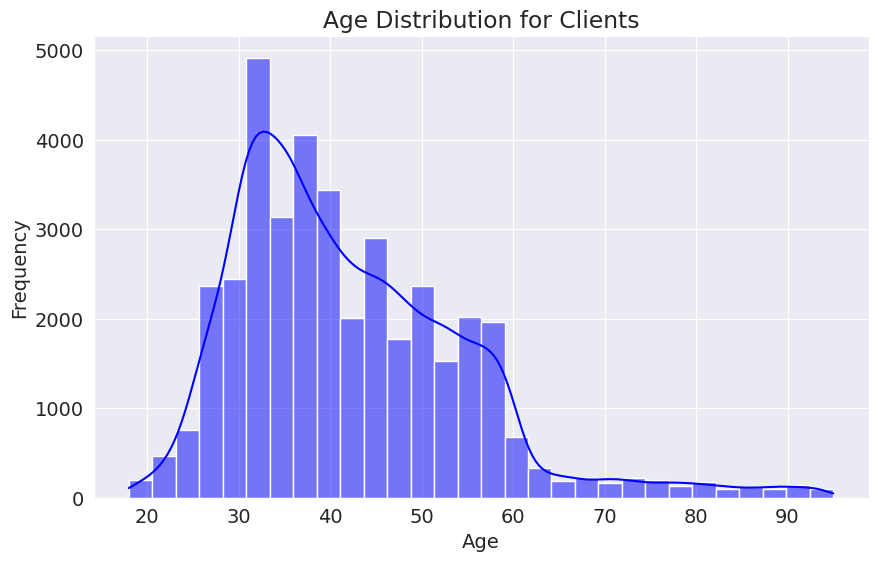

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['age'], bins=30, kde=True, color='blue')

# Add labels and title
plt.title('Age Distribution for Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

now let us visualize the distribution of the client's age who have subscribed to the deposit.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


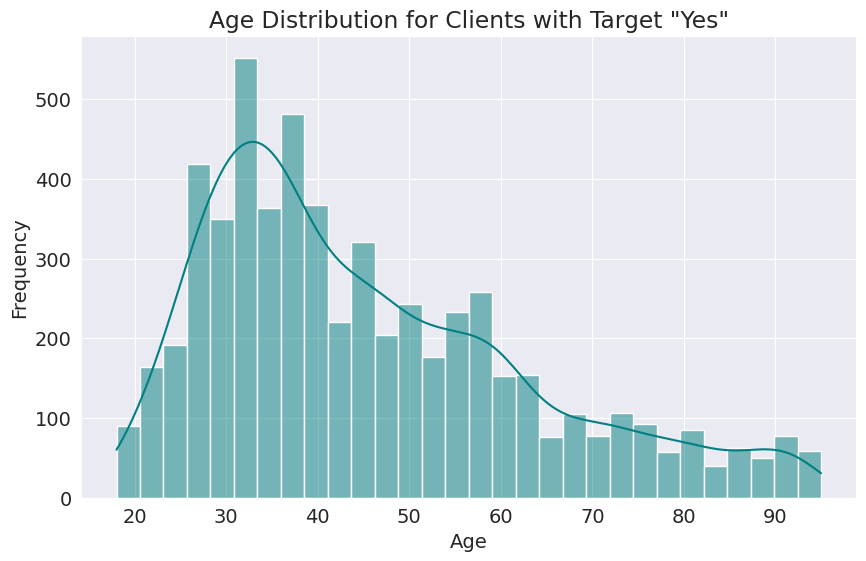

In [47]:
# Filter the DataFrame for entries where the target is 'yes'
filtered_df = raw_df[raw_df['target'] == 'yes']

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['age'], bins=30, kde=True, color='teal')

# Add labels and title
plt.title('Age Distribution for Clients with Target "Yes"')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The pattern shows that the majority of the client lies between age of 25 to 45. The distribution of ages in the dataset is almost left skewed with the median of 40 years.

# Job

Job is a categorical column which contain blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid' values.

 let us visualize the distribution of the various job categories who have subscribed to the deposit using pie chart .

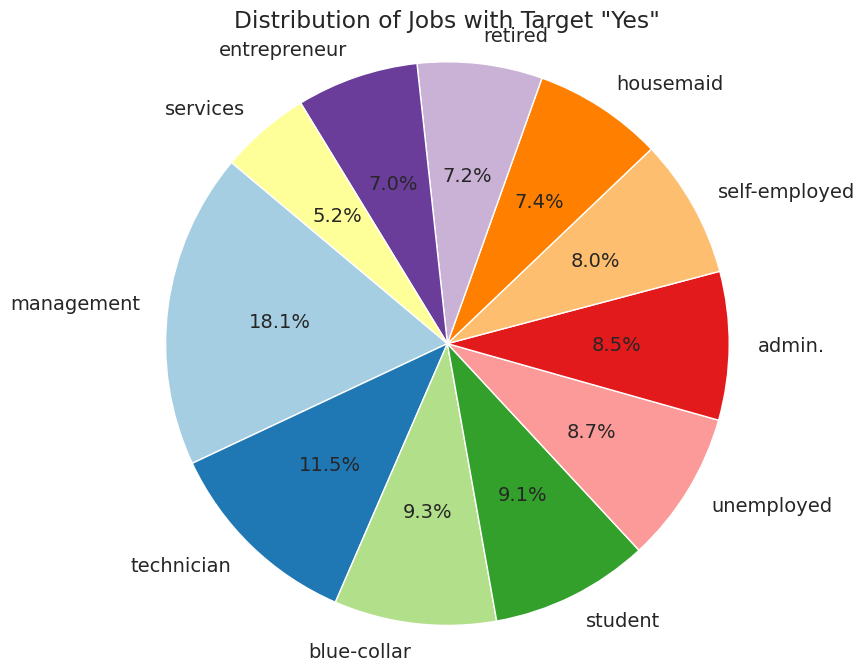

In [48]:
# Get the counts of each job category where the target is 'yes'
job_counts = filtered_df['job'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Jobs with Target "Yes"')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

Here we can interpret that client with management category have higher contribution in subscription of 18.1% followed by technician with 11.5% whereas client with serive as occupation seems to the less contribution of about 5.2% in overall distribution.

# Marital Status

Marital is a categorical column which contains three categories married, divorced and single. Let us visualize the contribution of each martial categories using pie chart.

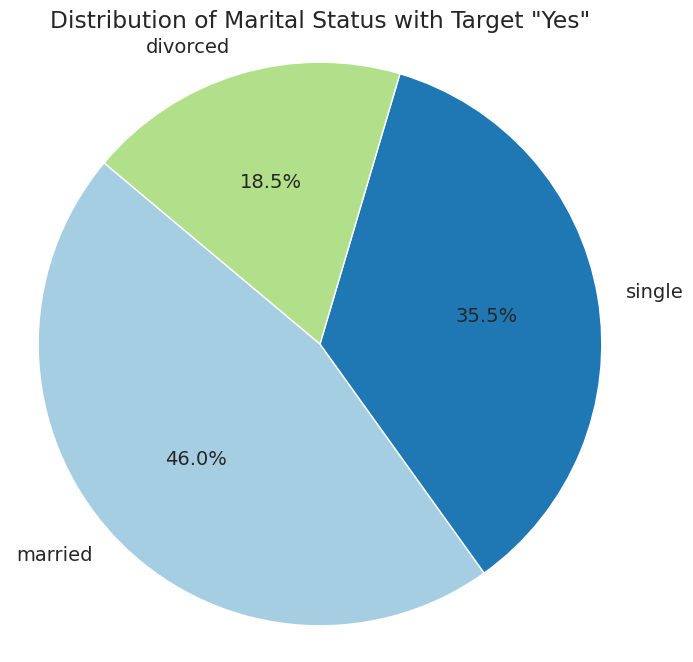

In [49]:
filtered_df = raw_df[raw_df['target'] == 'yes'].dropna(subset=['marital'])

# Get the counts of each marital status where the target is 'yes'
marital_counts = filtered_df['marital'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Marital Status with Target "Yes"')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()

Here we can see the highest contribution is made by the married community of 46% followed by single of 35.5% and least by divorced category of 18.5% .

# Education

now let us see the distribution of education in the dataset using bar plot.

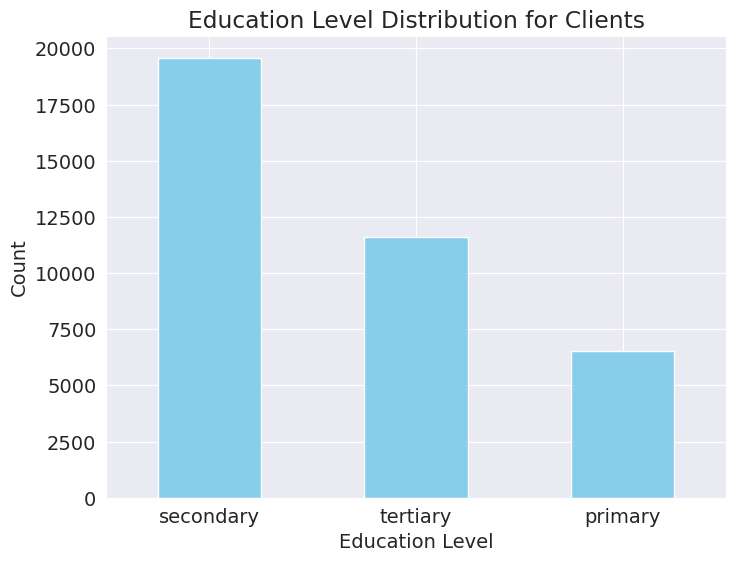

In [50]:
education_counts = raw_df['education'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Education Level Distribution for Clients' )
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=0)
plt.show()

Here we can see that the majority of the dataset contains the information of clients which have secondary education of about 19584 entries followed by tertiary of 11615 entries and then primary education of 6545 .

Now let us see that is the same distribution is followed by the client who have subscribed for the deposit or is there any change.

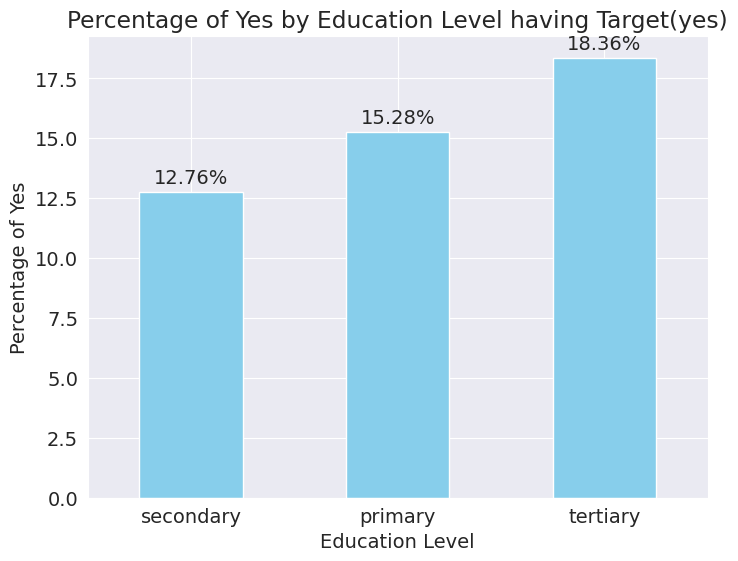

In [51]:
total_counts = raw_df['education'].value_counts()

# Filter the DataFrame for entries where the target is 'yes' and calculate the count of 'yes' for each education category
yes_counts = raw_df[raw_df['target'] == 'yes']['education'].value_counts()

# Calculate the percentage of 'yes' in each category
yes_percentages = (yes_counts / total_counts) * 100

# Filter the percentages for the categories "unknown", "secondary", "primary", and "tertiary"
education_categories = ['secondary', 'primary', 'tertiary']
yes_percentages = yes_percentages[education_categories]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars=yes_percentages.plot(kind='bar', color='skyblue')

plt.title('Percentage of Yes by Education Level having Target(yes)')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Yes')

# Add markers (values) on top of each bar
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}%',
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  xytext=(0, 3),  # Offset the text a little bit above the bar
                  textcoords="offset points",
                  ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)
plt.show()

And Here we find the difference !! Even though the majority of the client have secondary education level but only 12.76% of them have actually have subscribed to the deposit whereas the least number of client were from primary level category comprise 15.28% of subscription which is more than of secondary and the highest subscription is taken from tertiary level clients of 18.36%.

# Contact

Let us visulize the distribution of various communication channels through which the contact were made and also the percentage of each channel through which the client subscribed.

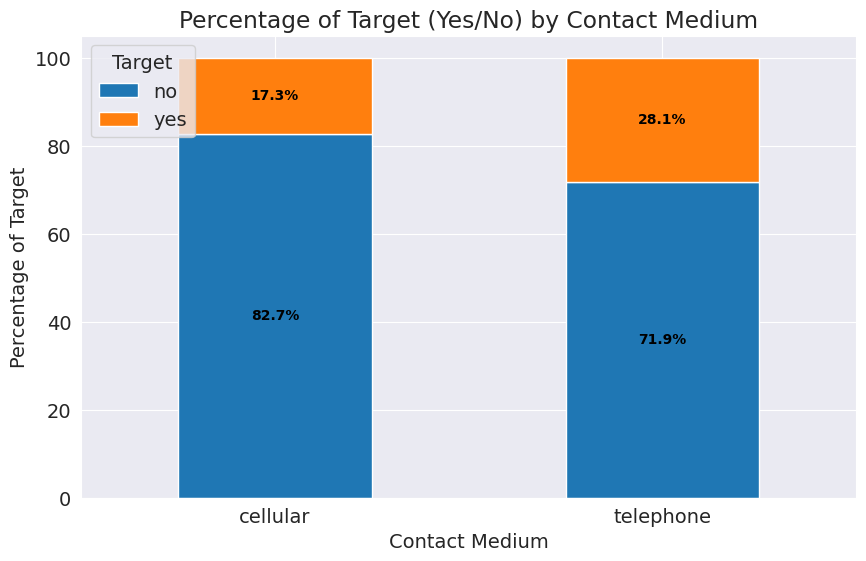

In [52]:
contact_target_counts = raw_df.groupby(['contact', 'target'])['target'].count().unstack()
contact_target_percentages = contact_target_counts.div(contact_target_counts.sum(axis=1), axis=0) * 100

ax = contact_target_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Contact Medium')
plt.ylabel('Percentage of Target')
plt.title('Percentage of Target (Yes/No) by Contact Medium')

for container in ax.containers:
    for i, rect in enumerate(container):
        height = rect.get_height()
        if height > 0:  # Only annotate if the height is greater than 0
            ax.annotate(f'{height:.1f}%',
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                        xytext=(0, 0),  # Offset the text a little bit above the bar
                        textcoords="offset points",
                        ha='center', va='center',
                        color='black',
                        fontsize=10,
                        weight='bold')

plt.legend(title='Target', loc='upper left')
plt.xticks(rotation=0)
plt.show()


Here we can see that the client which were contacted by the telephone have higher rate of subscribing the deposit of about 28.1% and the clients who were contacted by cellular having less success rate of about 17.3%.

This also provides a suggestion that the bank should focus on telephone channel for the communation as it have higher success rate.

# Duration

Let us visualize the effect of duration on the target variable using voilen plot.

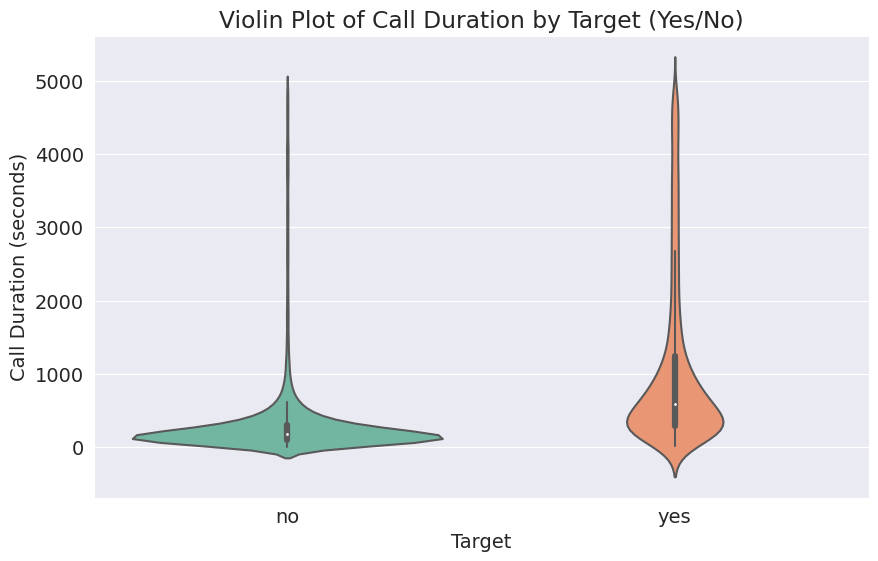

In [53]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='duration', data=raw_df, palette='Set2')

# Add labels and title
plt.title('Violin Plot of Call Duration by Target (Yes/No)')
plt.xlabel('Target')
plt.ylabel('Call Duration (seconds)')

# Show the plot
plt.show()


The violin plot shows a clear relationship between call duration and subscription likelihood. Clients who subscribed (yes) had significantly longer call durations, with many calls exceeding 1000 seconds, compared to non-subscribers (no), whose call durations were much shorter. The distribution for yes is more spread out, suggesting that longer calls are correlated with higher subscription rates, while shorter calls tend to result in non-subscriptions.

# Balance

Let us visualize the relationship with balance on the target variable using voilen plot.

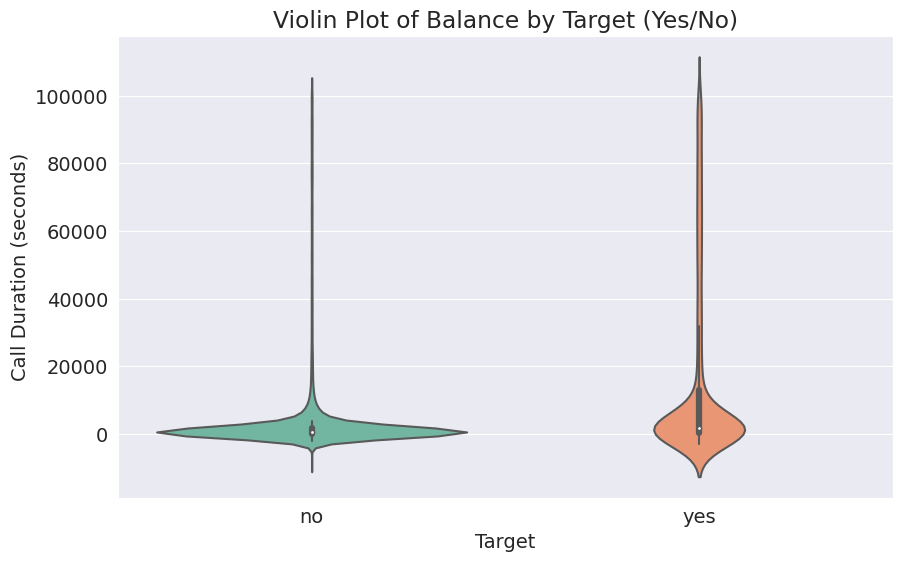

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='balance', data=raw_df, palette='Set2')

# Add labels and title
plt.title('Violin Plot of Balance by Target (Yes/No)')
plt.xlabel('Target')
plt.ylabel('Call Duration (seconds)')

# Show the plot
plt.show()

The violin plot shows the distribution of account balance for clients who subscribed (yes) and those who did not (no). Clients who subscribed tend to have a higher balance, with the distribution more spread out compared to non-subscribers. Most non-subscribers have low balances, while a small portion of non-subscribers have unusually high balances. This suggests a positive correlation between higher account balances and subscription likelihood.

# Default , Loan and Housing

Let us visualize the relationship with the default , loan and housing with the dependent variable using crossplot and heatmap.

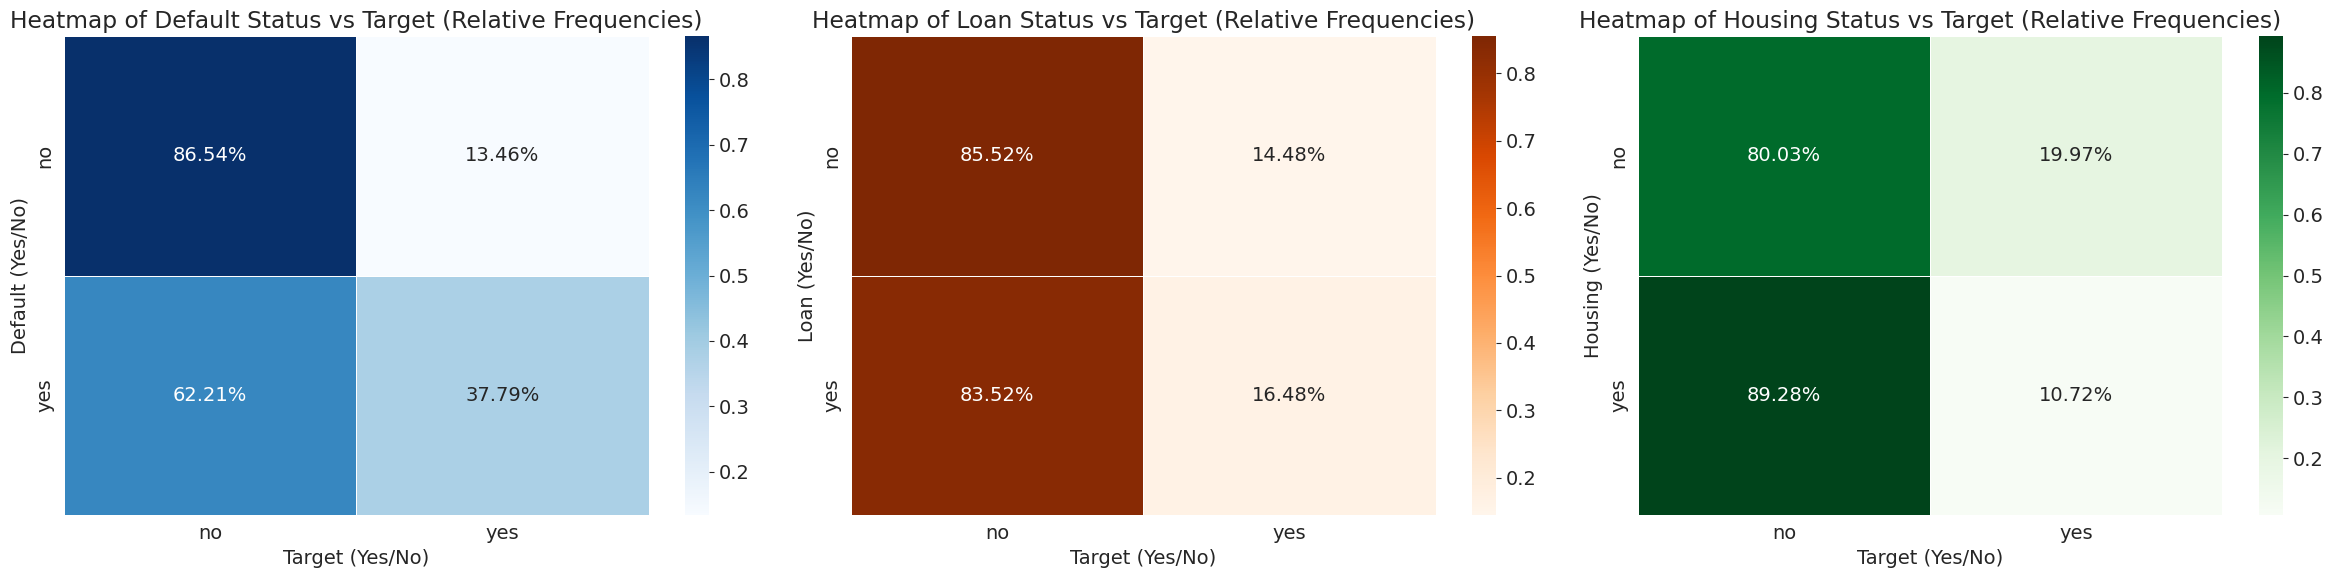

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# 1st Heatmap: Default vs Target
crosstab_default = pd.crosstab(raw_df['default'], raw_df['target'], normalize='index')
sns.heatmap(crosstab_default, annot=True, fmt='.2%', cmap='Blues', linewidths=0.5, ax=axes[0])
axes[0].set_title('Heatmap of Default Status vs Target (Relative Frequencies)')
axes[0].set_xlabel('Target (Yes/No)')
axes[0].set_ylabel('Default (Yes/No)')

# 2nd Heatmap: Loan vs Target
crosstab_loan = pd.crosstab(raw_df['loan'], raw_df['target'], normalize='index')
sns.heatmap(crosstab_loan, annot=True, fmt='.2%', cmap='Oranges', linewidths=0.5, ax=axes[1])
axes[1].set_title('Heatmap of Loan Status vs Target (Relative Frequencies)')
axes[1].set_xlabel('Target (Yes/No)')
axes[1].set_ylabel('Loan (Yes/No)')

# 3rd Heatmap: Housing vs Target
crosstab_housing = pd.crosstab(raw_df['housing'], raw_df['target'], normalize='index')
sns.heatmap(crosstab_housing, annot=True, fmt='.2%', cmap='Greens', linewidths=0.5, ax=axes[2])
axes[2].set_title('Heatmap of Housing Status vs Target (Relative Frequencies)')
axes[2].set_xlabel('Target (Yes/No)')
axes[2].set_ylabel('Housing (Yes/No)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined heatmaps
plt.show()

## 1. Default vs Target:

* *For clients who do not have a credit default*:
 **86.54%** did not subscribe (no), while 1**3.46%** subscribed (yes).
* *For clients who do have a credit default*:
 **62.21%** did not subscribe (no), while **37.79%** subscribed (yes).

  Clients with a default on their credit are more likely to subscribe to a term deposit, as 37.79% of them did so, compared to only 13.46% of those without a default.

## 2. Loan vs Target:

* *For clients who do not have a personal loan*:
 **85.52%** did not subscribe (no), while **14.48%** subscribed (yes).
* *For clients who do have a personal loan:*
 **83.52%** did not subscribe (no), while **16.48%** subscribed (yes).

The difference in subscription rate between clients with or without a personal loan is minimal. Having a loan doesn't seem to have a strong influence on the likelihood of subscribing to the term deposit.

## 3. Housing vs Target:

* *For clients who do not have a housing loan*:
 **80.03%** did not subscribe (no), while **19.97%** subscribed (yes).
* *For clients who do have a housing loan*:
 **89.28%** did not subscribe (no), while **10.72%** subscribed (yes).

Clients without a housing loan are more likely to subscribe to a term deposit (19.97% subscription rate) compared to those with a housing loan (only 10.72%).

# **Data Preprocessing and Feature Engineering**

In [56]:
test_df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
test_df.shape
print(raw_df.shape)
print(test_df.shape)

(39211, 16)
(10000, 15)


 ## extracting the month and year value from the data and storing it in the month column.

In [57]:
raw_df['last contact date'] = pd.to_datetime(raw_df['last contact date'])

# Extract month and year
raw_df['month'] = raw_df['last contact date'].dt.month
raw_df['year'] = raw_df['last contact date'].dt.year

In [58]:
test_df['last contact date'] = pd.to_datetime(test_df['last contact date'])

# Extract month and year
test_df['month'] = test_df['last contact date'].dt.month
test_df['year'] = test_df['last contact date'].dt.year

## Handling Missing Values by replacing it with the 'unknown'.

In [59]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_cols:
    raw_df[col] = raw_df[col].fillna('Unknown')

In [60]:
for col in categorical_cols:
    test_df[col] = test_df[col].fillna('Unknown')

## Handling columns having Binary values 

In [61]:
binary_columns = ['default', 'housing', 'loan']
raw_df[binary_columns] = raw_df[binary_columns].map(lambda x: 1 if x == 'yes' else 0)

In [62]:
raw_df['target'] = raw_df['target'].map(lambda x: 1 if x == 'yes' else 0)

In [63]:
binary_columns = ['default', 'housing', 'loan']
test_df[binary_columns] = test_df[binary_columns].map(lambda x: 1 if x == 'yes' else 0)

## One Hot Encoding

**Encoding the columns job , marital , education , contact ,poutcome ,month and year**

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(raw_df[['job','marital','education','contact','poutcome','month','year']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'contact', 'poutcome','month','year']))
raw_df = pd.concat([raw_df.drop(['job', 'marital', 'education', 'contact', 'poutcome','month','year'], axis=1), encoded_df], axis=1)


In [65]:
encoded_test_columns = encoder.fit_transform(test_df[['job','marital','education','contact','poutcome','month','year']])
encoded_test_df = pd.DataFrame(encoded_test_columns, columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'contact', 'poutcome','month','year']))
test_df = pd.concat([test_df.drop(['job', 'marital', 'education', 'contact', 'poutcome','month','year'], axis=1), encoded_test_df], axis=1)

In [66]:
raw_df = raw_df.drop('last contact date', axis=1)
test_df = test_df.drop('last contact date', axis=1)

## Handling Numerical features.

In [67]:
columns_to_plot = ['age', 'pdays', 'previous', 'campaign', 'duration', 'balance']
raw_df[columns_to_plot].describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0


### Robust Transformation in age column for handling outliers

In [68]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
raw_df['age'] = scaler.fit_transform(raw_df[['age']])
test_df['age']= scaler.fit_transform(test_df[['age']])

### Binarizing transformation in pdays and previous column

In [69]:
raw_df['pdays'] = np.where(raw_df['pdays'] == -1, 0, 1)

# Apply binary transformation on 'previous'
raw_df['previous'] = np.where(raw_df['previous'] == 0, 0, 1)

test_df['pdays'] = np.where(test_df['pdays'] == -1, 0, 1)

# Apply binary transformation on 'previous'
test_df['previous'] = np.where(test_df['previous'] == 0, 0, 1)

### Applying log transformation in Duration and Campaign column

In [70]:
raw_df['campaign'] = np.log1p(raw_df['campaign'])
test_df['campaign'] = np.log1p(test_df['campaign'])

In [71]:
raw_df['duration'] = np.log1p(raw_df['duration'])
test_df['duration'] = np.log1p(test_df['duration'])

### Appling BOX-COX transformation to Balance columns as it contains negative values too.

In [72]:
from scipy import stats
min_balance = raw_df['balance'].min()
shift_value = abs(min_balance) + 1  # Shift value to ensure all values are positive
raw_df['balance'] += shift_value
raw_df['balance'], lambda_ = stats.boxcox(raw_df['balance'])
print(f'Lambda for Box-Cox transformation: {lambda_}')

Lambda for Box-Cox transformation: -0.21953666103837285


In [73]:
test_df['balance'] += shift_value
test_df['balance'], lambda_ = stats.boxcox(test_df['balance'])

### Visualizing the distribution after the transformation

In [74]:
columns_to_plot = ['age', 'pdays', 'previous', 'campaign', 'duration', 'balance']
raw_df[columns_to_plot].describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,0.124720,0.747609,-1.294118,-0.411765,0.000000,0.588235,3.235294
pdays,39211.0,0.249037,0.432461,0.000000,0.000000,0.000000,0.000000,1.000000
previous,39211.0,0.248782,0.432313,0.000000,0.000000,0.000000,0.000000,1.000000
campaign,39211.0,1.327938,0.785957,0.693147,0.693147,1.098612,1.609438,4.158883
duration,39211.0,5.362719,1.127746,0.000000,4.700480,5.288267,5.942799,8.500861
balance,39211.0,3.954358,0.063472,0.000000,3.923763,3.931212,3.952668,4.198929


## Scaling the feature matrix with StandardScaler 

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns=['age', 'duration','balance','campaign']
raw_df[scaled_columns] = scaler.fit_transform(raw_df[scaled_columns])
test_df[scaled_columns] = scaler.fit_transform(test_df[scaled_columns])

In [76]:
print(len(raw_df.columns))
print(len(test_df.columns))

51
50


## Saving the processed dataset into csv file for model training 

In [77]:
raw_df.to_csv('processed_input.csv', index=False)
test_df.to_csv('processed_test.csv',index=False)

# **Training and Validation Set**

In [78]:
from sklearn.model_selection import train_test_split
input_df=pd.read_csv('/kaggle/working/processed_input.csv')
test_df=pd.read_csv('/kaggle/working/processed_test.csv')

X = input_df.drop('target', axis=1)
y = input_df['target']

X_input = X
y_train=y
X_test=test_df

print(X_input.shape)
print(y_train.shape)
print(X_test.shape)

                    


(39211, 50)
(39211,)
(10000, 50)


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score , f1_score
from sklearn.model_selection import ShuffleSplit

import numpy as np


In [80]:
cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 42)

In [143]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.array([0, 1])
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Training model using Logistic Regression

In [144]:
X_train,X_val,y_train_split,y_val=train_test_split(X_input,y_train,test_size=0.25,random_state=42)

In [145]:
log = LogisticRegression(max_iter=1000,class_weight={0: class_weights[0], 1: class_weights[1]})
log.fit(X_train,y_train_split)
log.score(X_train,y_train_split)

0.8205250272034821

In [146]:
cv_train_score = cross_val_score(log,X_input,y_train,cv = cv,scoring='f1_macro')
cv_train_score.mean()

0.7289475752994629

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [147]:
lr = LogisticRegression(max_iter=2000,class_weight={0: class_weights[0], 1: class_weights[1]},C=1,solver='lbfgs',penalty='l2',random_state=42)
lr.fit(X_train, y_train_split)

#  Predict on the validation set|
y_pred = lr.predict(X_val)

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')

# Step 6: Display both the accuracy and macro F1 score
print(f"Training Accuracy: {lr.score(X_train, y_train_split)}")
print(f"Validation Accuracy: {accuracy}")
print(f"Macro F1 Score: {macro_f1}")

Training Accuracy: 0.8205250272034821
Validation Accuracy: 0.8199530755891054
Macro F1 Score: 0.7327368966580773


In [148]:
lr = LogisticRegression(max_iter=2000,class_weight='balanced',C=1,solver='liblinear',penalty='l2',random_state=42)
lr.fit(X_train, y_train_split)

#  Predict on the validation set|
y_pred = lr.predict(X_val)

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score

macro_f1 = f1_score(y_val, y_pred, average='macro')

# Step 6: Display both the accuracy and macro F1 score
print(f"Training Accuracy: {lr.score(X_train, y_train_split)}")
print(f"Validation Accuracy: {accuracy}")
print(f"Macro F1 Score: {macro_f1}")

Training Accuracy: 0.8196749183895539
Validation Accuracy: 0.8189329797000918
Macro F1 Score: 0.7317788977598022


In [149]:
lr = LogisticRegression(max_iter=2000,class_weight={0: class_weights[0], 1: class_weights[1]},C=1,solver='liblinear',penalty='l1',random_state=42)
lr.fit(X_train, y_train_split)

#  Predict on the validation set
y_pred = lr.predict(X_val)

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')

# Step 6: Display both the accuracy and macro F1 score
print(f"Training Accuracy: {lr.score(X_train, y_train_split)}")
print(f"Validation Accuracy: {accuracy}")
print(f"Macro F1 Score: {macro_f1}")

Training Accuracy: 0.8205250272034821
Validation Accuracy: 0.8200550851780067
Macro F1 Score: 0.7328420973010465


In [150]:
weights = np.linspace(0.05,1,20)
gsc = GridSearchCV(
        estimator=LogisticRegression(max_iter=1000),
        param_grid = {
            'class_weight' : [{0:x,1:1.0-x} for x in weights]
        },
        scoring ='f1_macro',
        cv=5
        )
gsc_result = gsc.fit(X_input,y_train)
print(gsc_result.best_params_)

{'class_weight': {0: 0.25, 1: 0.75}}


In [151]:
data_out=pd.DataFrame({'score' : gsc_result.cv_results_['mean_test_score'],
                      'weight':weights})
data_out

,score,weight
0,0.612452,0.05
1,0.693895,0.10
2,0.731047,0.15
3,0.745442,0.20
4,0.749551,0.25
5,0.746402,0.30
6,0.729244,0.35
7,0.712216,0.40
8,0.692647,0.45
9,0.667065,0.50


In [152]:
lr = LogisticRegression(**gsc_result.best_params_, max_iter=2000)
lr.fit(X_train, y_train_split)

#  Predict on the validation set
y_pred = lr.predict(X_val)

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')

# Step 6: Display both the accuracy and macro F1 score
print(f"Training Accuracy: {lr.score(X_train, y_train_split)}")
print(f"Validation Accuracy: {accuracy}")
print(f"Macro F1 Score: {macro_f1}")

Training Accuracy: 0.861092219804135
Validation Accuracy: 0.8586147097827196
Macro F1 Score: 0.75144523326572


**best f1 score on logistic regression is 0.75514**

In [ ]:
y_pred=lr.predict(X_test)
predictions = ['yes' if pred == 1 else 'no' for pred in y_pred]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(0, len(test_df)),
    'target': predictions
})

# Save to CSV
csv_file_path = '/kaggle/working/submission_lr.csv'
submission_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

print("Submission file created: submission_lr.csv")

## Training my model using SGDClassifier

In [153]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000,class_weight={0:0.25, 1:0.75},loss='hinge')
sgd.fit(X_train,y_train_split)
sgd.score(X_train,y_train_split)

0.8502788356909684

In [154]:
cv_train_score = cross_val_score(sgd,X_input,y_train,cv = cv,scoring='f1_macro')
cv_train_score.mean()

0.7486249977272423

**The f1 score for sgd classifier is 0.748 which is less than threshold**

## Dimensionality Reduction(RFE)

In [156]:
from sklearn.feature_selection import RFE

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Set up RFE to select the top 25 features
selector = RFE(estimator=model, n_features_to_select=25, step=1)

# Fit RFE on the data
selector.fit(X_input, y_train)

# Get the selected features
selected_features = X_input.columns[selector.support_]
print("Top 25 selected features:")
print(selected_features)

Top 25 selected features:
Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'job_management', 'job_technician', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'contact_cellular',
       'poutcome_Unknown', 'poutcome_failure', 'poutcome_success', 'month_3',
       'month_4', 'month_5', 'month_9', 'month_10', 'year_2008', 'year_2009',
       'year_2010'],
      dtype='object')


### logistic regression

In [157]:
lr = LogisticRegression(class_weight={0:0.25, 1:0.75}, max_iter=2000,penalty='l2')
lr.fit(X_train[selected_features], y_train_split)

#  Predict on the validation set
y_pred = lr.predict(X_val[selected_features])

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.7425324848279986


### Random Forest Classifier

In [158]:
rfe = RandomForestClassifier(class_weight={0:0.25, 1:0.75})
rfe.fit(X_train[selected_features], y_train_split)

#  Predict on the validation set
y_pred = rfe.predict(X_val[selected_features])

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.6945128052650538


In [ ]:
param_grid = [{'n_estimators' : [10,100,200],
             'min_samples_split':range(10,60,5),
             'min_samples_leaf': range(10,50,5),
              'max_depth': range(2,12,2),}]
random = RandomForestClassifier()
clf = RandomizedSearchCV(random,param_grid,scoring='f1_macro',n_jobs=-1,verbose=0,cv=5,random_state=42)
clf.fit(X_input[selected_features],y_train)
clf.best_params_

In [159]:
rfe = RandomForestClassifier(class_weight={0:0.25, 1:0.75},n_estimators=100,min_samples_split=35,min_samples_leaf=20,max_depth=10,random_state=42)
rfe.fit(X_train[selected_features], y_train_split)

#  Predict on the validation set
y_pred = rfe.predict(X_val[selected_features])

#  Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Step 5: Calculate the macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.7591432530749289


**The performance has increased in the selected features from random forest classifier**

In [ ]:
y_pred=rfe.predict(X_test[selected_features])
predictions = ['yes' if pred == 1 else 'no' for pred in y_pred]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(0, len(test_df)),
    'target': predictions
})

# Save to CSV
csv_file_path = '/kaggle/working/submission_rfe.csv'
submission_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

print("Submission file created: submission_rfe.csv")

## Performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)
print("Number of components chosen:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", pca.explained_variance_ratio_.cumsum())


### logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000,class_weight={0:0.25, 1:0.75})
log_reg.fit(X_train_pca, y_train_split)
y_pred = log_reg.predict(X_val_pca)
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1}")


### Random Forest Classifier

In [ ]:
rnc = RandomForestClassifier(random_state=42,class_weight={0:0.25, 1:0.75},n_estimators=50,min_samples_split=50,min_samples_leaf=20,max_depth=10)
rnc.fit(X_train_pca, y_train_split)

# Predict and calculate Macro F1 score on the validation set
y_val_pred = rnc.predict(X_val_pca)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Macro F1 Score with PCA: {macro_f1}")

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=None)  # 'None' selects max components based on classes
X_train_lda = lda.fit_transform(X_train, y_train_split)
X_val_lda = lda.transform(X_val)

### logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42,class_weight={0:0.25, 1:0.75},penalty='l2')
log_reg.fit(X_train_lda, y_train_split)

# Predict and calculate Macro F1 score on the validation set
y_val_pred = log_reg.predict(X_val_lda)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Macro F1 Score with LDA: {macro_f1}")

### Random Forest Classifier

In [ ]:
rnc = RandomForestClassifier(random_state=42,class_weight={0:0.25, 1:0.75},n_estimators=50,min_samples_split=50,min_samples_leaf=20,max_depth=10)
rnc.fit(X_train_lda, y_train_split)

# Predict and calculate Macro F1 score on the validation set
y_val_pred = rnc.predict(X_val_lda)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Macro F1 Score with LDA: {macro_f1}")

In [ ]:
param_grid = [{'n_estimators' : [10,100,200],
             'min_samples_split':range(10,60,5),
             'min_samples_leaf': range(10,50,5),
              'max_depth': range(2,12,2),}]
random = RandomForestClassifier()
clf = RandomizedSearchCV(random,param_grid,scoring='f1_macro',n_jobs=-1,verbose=0,cv=5,random_state=42)
clf.fit(X_train_lda,y_train_split)
clf.best_params_

In [ ]:
rnc = RandomForestClassifier(random_state=42,class_weight={0:0.25, 1:0.75},n_estimators=200,min_samples_split=10,min_samples_leaf=40,max_depth=6)
rnc.fit(X_train_lda, y_train_split)

# Predict and calculate Macro F1 score on the validation set
y_val_pred = rnc.predict(X_val_lda)
macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Macro F1 Score with LDA: {macro_f1}")

## Gradient Boost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Calculate scale_pos_weight as the ratio of negative to positive samples
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]  # Ratio of negative to positive class

# Initialize XGBClassifier with scale_pos_weight
xgb = XGBClassifier(
    random_state=42, 
    n_jobs=-1, 
    n_estimators=100,  # Adjust as needed
    max_depth=4,       # Adjust as needed
    scale_pos_weight=scale_pos_weight
)

# Fit the model
xgb.fit(X_train, y_train_split)

# Predict on the validation set
y_pred = xgb.predict(X_val)

# Evaluate using macro F1 score
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with XGBoost: {macro_f1}")

### with selected features

In [ ]:
xgb1 = XGBClassifier(
    random_state=42, 
    n_jobs=-1, 
    scale_pos_weight=scale_pos_weight
)
xgb1.fit(X_train[selected_features],y_train_split)
y_pred=xgb1.predict(X_val[selected_features])
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with XGBoost with selected features is : {macro_f1}")

In [86]:
xgb1 = XGBClassifier(
    random_state=42, 
    n_jobs=-1, 
    scale_pos_weight=5.7291916, 
    subsample=0.7,
    n_estimator=300,
    max_depth=9,
    learning_rate=0.05,colsample_bytree=0.8    
)
xgb1.fit(X_train[selected_features],y_train_split)
y_pred=xgb1.predict(X_val[selected_features])
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with XGBoost with selected features is : {macro_f1}")

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:09:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Macro F1 Score with XGBoost with selected features is : 0.751786272215311


### Hyperparameter tuning

In [84]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],            # Number of trees
    'max_depth': [3, 4, 5, 6, 7],                   # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],        # Step size shrinkage
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],         # Subsampling ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsampling ratio of columns
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],               # Minimum loss reduction to split a leaf
    'scale_pos_weight': [scale_pos_weight],          # Weight to balance classes
    'reg_alpha': [0, 0.1, 0.5, 1],                  # L1 regularization term
    'reg_lambda': [0.1, 0.5, 1, 1.5]                # L2 regularization term
}

# Initialize the classifier
xgb = XGBClassifier(random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV with scoring based on F1 macro
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='f1_macro',  # Use macro F1 score
    cv=5,  # 3-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the random search model
random_search.fit(X_train, y_train_split)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

# Predict on the validation set using the best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_val)

# Calculate and print macro F1 score on validation set
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with Best XGBoost Model: {macro_f1}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 5.7291916938390255, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 1.0}
Macro F1 Score with Best XGBoost Model: 0.7672567048122235


In [85]:
cv_train_score = cross_val_score(best_xgb,X_input,y_train,cv = cv,scoring='f1_macro')
cv_train_score.mean()

0.7597532400105861

In [101]:
xgb = XGBClassifier(
    random_state=42, 
    n_jobs=-1, 
    scale_pos_weight=scale_pos_weight, 
    subsample=0.7,
    max_depth=9,
    learning_rate=0.05,colsample_bytree=1,
    reg_lambda=1,gamma=0.4, 
    
)
xgb.fit(X_train,y_train_split)
y_pred=xgb.predict(X_val)
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with XGBoost with selected features is : {macro_f1}")

Macro F1 Score with XGBoost with selected features is : 0.7654738614593019


In [99]:
cv_train_score = cross_val_score(xgb,X_input,y_train,cv = cv,scoring='f1_macro')
cv_train_score.mean()

0.7570004832578834

In [107]:
xgb_clf = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Adjust if dealing with class imbalance
    n_estimators=300,  # Set a high number to allow early stopping to take effect
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    use_label_encoder=False,  # Avoids warnings in newer versions of XGBoost
    eval_metric='logloss' ,
    early_stopping_rounds=15,# Metric for evaluation (change if needed)
)

# Fit the model with early stopping
xgb_clf.fit(
    X_train, y_train_split,
    eval_set=[(X_val, y_val)],              # Validation data to monitor
    verbose=True                            # Print progress
)

# Predict on validation set and calculate Macro F1 Score
y_val_pred = xgb_clf.predict(X_val)
f1 = f1_score(y_val, y_val_pred, average='macro')
print("Macro F1 Score with Early Stopping:", f1)

[0]	validation_0-logloss:0.66610
[1]	validation_0-logloss:0.64410
[2]	validation_0-logloss:0.62437
[3]	validation_0-logloss:0.60644
[4]	validation_0-logloss:0.59010
[5]	validation_0-logloss:0.57533
[6]	validation_0-logloss:0.56174
[7]	validation_0-logloss:0.54924
[8]	validation_0-logloss:0.53747
[9]	validation_0-logloss:0.52670
[10]	validation_0-logloss:0.51692
[11]	validation_0-logloss:0.50775
[12]	validation_0-logloss:0.49933
[13]	validation_0-logloss:0.49159
[14]	validation_0-logloss:0.48432
[15]	validation_0-logloss:0.47750
[16]	validation_0-logloss:0.47135
[17]	validation_0-logloss:0.46571
[18]	validation_0-logloss:0.46017
[19]	validation_0-logloss:0.45512
[20]	validation_0-logloss:0.45028
[21]	validation_0-logloss:0.44565
[22]	validation_0-logloss:0.44089
[23]	validation_0-logloss:0.43711
[24]	validation_0-logloss:0.43304
[25]	validation_0-logloss:0.42907
[26]	validation_0-logloss:0.42593
[27]	validation_0-logloss:0.42276
[28]	validation_0-logloss:0.41980
[29]	validation_0-loglos

In [109]:
from sklearn.feature_selection import SelectFromModel

# Initialize an XGBoost classifier with relevant hyperparameters
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model and use SelectFromModel for feature selection
xgb.fit(X_input, y_train)
selector = SelectFromModel(xgb, threshold="median")  # You can adjust the threshold as needed

# Transform the input data to select the important features
X_selected = selector.transform(X_input)
selected_features = selector.get_support(indices=True)  # Indices of selected features

print(f"Number of features selected: {X_selected.shape[1]}")
print(f"Selected feature indices: {selected_features}")

Number of features selected: 25
Selected feature indices: [ 0  2  3  4  5  7  8 11 18 22 23 28 31 34 35 36 37 38 39 40 41 42 43 44
 45]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [113]:
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:,selected_features]

In [129]:
xgb = XGBClassifier(
    random_state=42, 
    n_jobs=-1, 
    scale_pos_weight=scale_pos_weight, 
    subsample=0.7,
    max_depth=14,
    learning_rate=0.05,colsample_bytree=1,
    reg_lambda=1,gamma=0.4, 
    
)
xgb.fit(X_train_selected,y_train_split)
y_pred=xgb.predict(X_val_selected)
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with XGBoost with selected features is : {macro_f1}")

Macro F1 Score with XGBoost with selected features is : 0.7639000860354961


In [130]:
cv_train_score = cross_val_score(xgb,X_input.iloc[:,selected_features],y_train,cv = cv,scoring='f1_macro')
cv_train_score.mean()

0.7585913549740928

In [132]:
y_pred=xgb.predict(X_test.iloc[:,selected_features])
predictions = ['yes' if pred == 1 else 'no' for pred in y_pred]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(0, len(test_df)),
    'target': predictions
})

# Save to CSV
csv_file_path = '/kaggle/working/submission_xgb.csv'
submission_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

print("Submission file created: submission_xgb.csv")

CSV file saved at: /kaggle/working/submission_xgb.csv
Submission file created: submission_xgb.csv


# Cat Boost Classifier

In [136]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=500,  # Increase if needed
    depth=6,
    learning_rate=0.1,
    class_weights=[0.25,0.75],  # Adjust based on imbalance
    random_seed=42,
    eval_metric='F1'  # Can be changed to 'F1' or 'AUC' depending on needs
)


catboost_model.fit(X_train, y_train_split, verbose=50)

# Evaluate performance
y_pred = catboost_model.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f"Macro F1 Score with CatBoost: {f1}")

0:	learn: 0.7062140	total: 10.2ms	remaining: 5.1s
50:	learn: 0.7844730	total: 526ms	remaining: 4.63s
100:	learn: 0.8013660	total: 1.02s	remaining: 4.04s
150:	learn: 0.8116457	total: 1.53s	remaining: 3.53s
200:	learn: 0.8207861	total: 2.13s	remaining: 3.17s
250:	learn: 0.8281778	total: 2.67s	remaining: 2.65s
300:	learn: 0.8364934	total: 3.17s	remaining: 2.1s
350:	learn: 0.8450138	total: 3.76s	remaining: 1.6s
400:	learn: 0.8527305	total: 4.29s	remaining: 1.06s
450:	learn: 0.8591612	total: 4.82s	remaining: 524ms
499:	learn: 0.8659747	total: 5.36s	remaining: 0us
Macro F1 Score with CatBoost: 0.7728079085170406


In [137]:
cv_train_score = cross_val_score(catboost_model,X_input,y_train,cv = cv,scoring='f1_macro')
cv_train_score.mean()

0:	learn: 0.7068411	total: 9.68ms	remaining: 4.83s
1:	learn: 0.7265929	total: 17.9ms	remaining: 4.46s
2:	learn: 0.7258656	total: 25.4ms	remaining: 4.21s
3:	learn: 0.7373911	total: 33.1ms	remaining: 4.11s
4:	learn: 0.7336397	total: 40.7ms	remaining: 4.03s
5:	learn: 0.7367808	total: 48.7ms	remaining: 4.01s
6:	learn: 0.7368961	total: 57ms	remaining: 4.01s
7:	learn: 0.7367803	total: 65.2ms	remaining: 4.01s
8:	learn: 0.7392165	total: 72.9ms	remaining: 3.98s
9:	learn: 0.7395211	total: 81ms	remaining: 3.97s
10:	learn: 0.7395359	total: 89.5ms	remaining: 3.98s
11:	learn: 0.7410262	total: 97.4ms	remaining: 3.96s
12:	learn: 0.7435247	total: 105ms	remaining: 3.95s
13:	learn: 0.7461823	total: 114ms	remaining: 3.95s
14:	learn: 0.7486283	total: 125ms	remaining: 4.03s
15:	learn: 0.7506028	total: 133ms	remaining: 4.02s
16:	learn: 0.7505746	total: 142ms	remaining: 4.04s
17:	learn: 0.7525379	total: 151ms	remaining: 4.03s
18:	learn: 0.7544989	total: 159ms	remaining: 4.04s
19:	learn: 0.7547320	total: 168ms

0.7652978443641084

In [138]:
y_pred=catboost_model.predict(X_test)
predictions = ['yes' if pred == 1 else 'no' for pred in y_pred]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(0, len(test_df)),
    'target': predictions
})

# Save to CSV
csv_file_path = '/kaggle/working/submission_cat.csv'
submission_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

print("Submission file created: submission_cat.csv")

CSV file saved at: /kaggle/working/submission_cat.csv
Submission file created: submission_cat.csv


In [140]:
from sklearn.metrics import make_scorer

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    class_weights=[0.25, 0.75],
    random_seed=42,
    verbose=0  # Suppress CatBoost's internal output
)

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'iterations': [100, 200, 300, 500],        # Number of boosting rounds
    'depth': [4, 6, 8, 10],                    # Depth of the trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Step size shrinkage
    'l2_leaf_reg': [1, 3, 5, 7, 9],            # L2 regularization (prevents overfitting)
    'bagging_temperature': [0, 0.5, 1, 2],     # Controls sampling strength
    'border_count': [32, 64, 128, 254]         # Number of splits for numerical features
}

# Define the scoring metric for RandomizedSearchCV
scorer = make_scorer(f1_score, average='macro')

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring=scorer,
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit on the training data
random_search.fit(X_selected, y_train)

# Display the best parameters and best F1 score achieved
print("Best Parameters:", random_search.best_params_)
print("Best Macro F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bagging_temperature=0, border_count=128, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  31.0s
[CV] END bagging_temperature=1, border_count=254, depth=10, iterations=100, l2_leaf_reg=7, learning_rate=0.01; total time=  11.9s
[CV] END bagging_temperature=1, border_count=254, depth=10, iterations=100, l2_leaf_reg=7, learning_rate=0.01; total time=  15.1s
[CV] END bagging_temperature=1, border_count=64, depth=8, iterations=300, l2_leaf_reg=7, learning_rate=0.01; total time=  22.6s
[CV] END bagging_temperature=0, border_count=64, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  21.0s
[CV] END bagging_temperature=2, border_count=64, depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.1; total time=  24.0s
[CV] END bagging_temperature=2, border_count=64, depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.1; total time=  24.7s
[CV] END bagging_temperature=1, border

In [141]:
cat_best=CatBoostClassifier(
    class_weights=[0.25, 0.75],
    random_seed=42,
    verbose=0,learning_rate=0.05, 
    l2_leaf_reg=7,iterations=200,depth=8,border_count=254,bagging_temperature=0.5
)
cat_best.fit(X_input,y_train)

[CV] END bagging_temperature=1, border_count=32, depth=4, iterations=300, l2_leaf_reg=7, learning_rate=0.01; total time=  12.2s
[CV] END bagging_temperature=1, border_count=32, depth=4, iterations=300, l2_leaf_reg=7, learning_rate=0.01; total time=  10.9s
[CV] END bagging_temperature=0.5, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.2; total time=   5.2s
[CV] END bagging_temperature=0.5, border_count=32, depth=8, iterations=200, l2_leaf_reg=9, learning_rate=0.1; total time=  13.5s
[CV] END bagging_temperature=0.5, border_count=254, depth=10, iterations=500, l2_leaf_reg=9, learning_rate=0.01; total time= 1.0min
[CV] END bagging_temperature=0, border_count=128, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  28.5s
[CV] END bagging_temperature=0, border_count=128, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  29.9s
[CV] END bagging_temperature=1, border_count=64, depth=8, iterations=300, l2_leaf_reg=7, learnin

In [142]:
y_pred=cat_best.predict(X_test)
predictions = ['yes' if pred == 1 else 'no' for pred in y_pred]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(0, len(test_df)),
    'target': predictions
})

# Save to CSV
csv_file_path = '/kaggle/working/submission_catbest.csv'
submission_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

print("Submission file created: submission_catbest.csv")

CSV file saved at: /kaggle/working/submission_catbest.csv
Submission file created: submission_catbest.csv


# Inference and Results

## Logistic Regression

Logistic Regression provided a straightforward baseline model. By tuning the class weights, I improved its handling of the class imbalance, achieving a Macro F1 Score of **0.7514**. The optimal class weights (0.25 and 0.75) balanced the contribution of each class, enhancing the performance. However, the linear nature of logistic regression limited its effectiveness on this dataset’s complexity compared to non-linear models.


 ## Random Forest

Random Forest showed significant improvement over logistic regression. Using feature selection through Recursive Feature Elimination (RFE) further refined the model by focusing on the most impactful features. This model demonstrated strong predictive power, and its ensemble nature helped mitigate overfitting to some degree. Overall, Random Forest performed robustly, though it was computationally more intensive. The best F1 score for the random forest classifier was **0.759143**.


 ## CatBoost

CatBoost emerged as the top-performing model with a final Macro F1 Score of **0.7733** on the test set. Its handling of categorical features, smooth support for class imbalance, and resistance to overfitting made it particularly effective for this dataset. The optimized class weights (0.25 and 0.75) and hyperparameters allowed CatBoost to adapt to the data’s complexity, leading to the best overall performance.

# Conclusion

Each model contributed insights into the data, with *logistic regression* serving as a strong baseline and *Random Forest* and *CatBoost* providing substantial performance improvements. *CatBoost’s* balanced handling of class imbalance, categorical data, and complex relationships proved most effective in this project, making it the final model of choice.






